In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [79]:
df = pd.read_csv('simba items data.csv')
df.head()

,n_distributor_id,dist_name,item_code,item_name,category_abc,category_fms,volume,pack,last_sale_date,last_purchase_date,...,sale_qty,purchase_qty,stock_adjustment_qty,sale_return_qty,customer_breakage_expiry_qty,godown_breakage_expiry_qty,line_cut_customer_count,line_cut_challan_count,line_cut_no_of_days,line_cut_total_qty
0,2,Simba,125,NIKOS 10MG 30TAB,C,S,178.7,BOTTLE,2023-04-17,2023-04-07,...,23.0,20.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,2.0
1,2,Simba,245,DIPTOGOLD 10TAB,A,F,71.7,STRIP,2023-04-20,2023-04-19,...,692.0,1050.0,7.0,27.0,NaN,4.0,8.0,8.0,6.0,7.0
2,2,Simba,282,INMECIN 25MG 10CAP,A,F,21.6,STRIP,2023-04-20,2023-04-06,...,1927.0,2875.0,NaN,54.0,5.0,4.0,9.0,9.0,6.0,27.0
3,2,Simba,384,OLEPTAL OD 450MG 10TAB,D,S,23.2,STRIP,2023-04-18,NaN,...,15.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Simba,405,LEMAK M 10TAB,D,S,31.4,STRIP,2023-03-21,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.describe()

,n_distributor_id,item_code,volume,sale_amt,purchase_amt,stock_adjustment_amt,sale_return_amt,customer_breakage_expiry_amt,godown_breakage_expiry_amt,sale_qty,purchase_qty,stock_adjustment_qty,sale_return_qty,customer_breakage_expiry_qty,godown_breakage_expiry_qty,line_cut_customer_count,line_cut_challan_count,line_cut_no_of_days,line_cut_total_qty
count,25041.0,25041.000000,22875.000000,2.353900e+04,1.727400e+04,11947.000000,12725.000000,1985.000000,1985.000000,23539.000000,17274.000000,11947.000000,12725.000000,1985.000000,4322.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,2.0,29172.042610,159.125655,1.538023e+04,2.006822e+04,1.783701,1620.692756,748.869758,748.869758,181.950210,242.583825,74.482129,12.378861,5.987909,8.303100,2.972592,3.158290,2.336903,8.612161
std,0.0,17447.781874,1027.927534,5.445680e+04,6.334065e+04,4052.639937,11207.958125,1788.660381,1788.660381,1102.491488,1169.078329,1429.522253,69.376682,14.138530,153.692929,5.257653,5.904556,2.202552,615.264023
min,2.0,2.000000,0.000000,0.000000e+00,0.000000e+00,-197779.560000,0.000000,6.430000,6.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-5950.000000
25%,2.0,14575.000000,21.900000,1.219440e+03,2.325125e+03,0.000000,167.670000,127.120000,127.120000,12.000000,24.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.0,28431.000000,64.700000,3.998210e+03,6.171100e+03,0.000000,411.430000,328.280000,328.280000,37.000000,60.000000,9.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,2.0,40059.000000,133.850000,1.241272e+04,1.674900e+04,0.000000,1030.290000,781.830000,781.830000,112.000000,160.000000,26.000000,9.000000,6.000000,3.000000,3.000000,3.000000,3.000000,4.000000
max,2.0,60030.000000,143000.000000,3.025263e+06,2.714293e+06,197886.460000,593687.820000,54227.590000,54227.590000,69000.000000,57600.000000,100280.000000,3975.000000,448.000000,9217.000000,142.000000,192.000000,30.000000,65593.000000


In [81]:
#convert data types
for col in [col for col in df.columns if 'date' in col]:
    df[col] = pd.to_datetime(df[col])

df['n_distributor_id'] = df['n_distributor_id'].astype('str')
df['item_code'] = df['item_code'].astype('str')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25041 entries, 0 to 25040
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   n_distributor_id                    25041 non-null  object        
 1   dist_name                           25041 non-null  object        
 2   item_code                           25041 non-null  object        
 3   item_name                           25041 non-null  object        
 4   category_abc                        24818 non-null  object        
 5   category_fms                        24818 non-null  object        
 6   volume                              22875 non-null  float64       
 7   pack                                20837 non-null  object        
 8   last_sale_date                      23539 non-null  datetime64[ns]
 9   last_purchase_date                  17274 non-null  datetime64[ns]
 10  last_stock_adjustment_

In [83]:
df['yesterday'] = (datetime.today() - timedelta(days=1)).date()
df['yesterday'] = pd.to_datetime(df['yesterday'])

In [84]:
df['purchase_days'] = (df['yesterday'] - df['last_purchase_date'])/np.timedelta64(1, 'D')
df['sale_days'] = (df['yesterday'] - df['last_sale_date'])/np.timedelta64(1, 'D')

In [85]:
df.head()

,n_distributor_id,dist_name,item_code,item_name,category_abc,category_fms,volume,pack,last_sale_date,last_purchase_date,...,sale_return_qty,customer_breakage_expiry_qty,godown_breakage_expiry_qty,line_cut_customer_count,line_cut_challan_count,line_cut_no_of_days,line_cut_total_qty,yesterday,purchase_days,sale_days
0,2,Simba,125,NIKOS 10MG 30TAB,C,S,178.7,BOTTLE,2023-04-17,2023-04-07,...,1.0,NaN,NaN,1.0,1.0,1.0,2.0,2023-04-20,13.0,3.0
1,2,Simba,245,DIPTOGOLD 10TAB,A,F,71.7,STRIP,2023-04-20,2023-04-19,...,27.0,NaN,4.0,8.0,8.0,6.0,7.0,2023-04-20,1.0,0.0
2,2,Simba,282,INMECIN 25MG 10CAP,A,F,21.6,STRIP,2023-04-20,2023-04-06,...,54.0,5.0,4.0,9.0,9.0,6.0,27.0,2023-04-20,14.0,0.0
3,2,Simba,384,OLEPTAL OD 450MG 10TAB,D,S,23.2,STRIP,2023-04-18,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-20,NaN,2.0
4,2,Simba,405,LEMAK M 10TAB,D,S,31.4,STRIP,2023-03-21,NaT,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-20,NaN,30.0


In [86]:
# df.info()

## EDA

### Sale

<AxesSubplot:xlabel='category_fms', ylabel='sale_qty'>

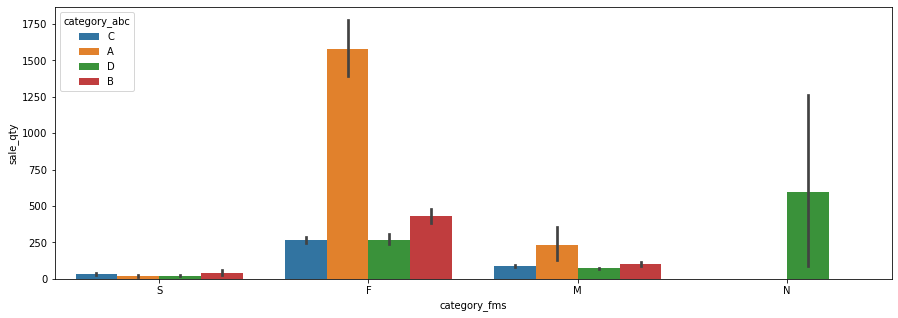

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='category_fms', y='sale_qty', hue='category_abc')

<AxesSubplot:xlabel='category_abc', ylabel='sale_amt'>

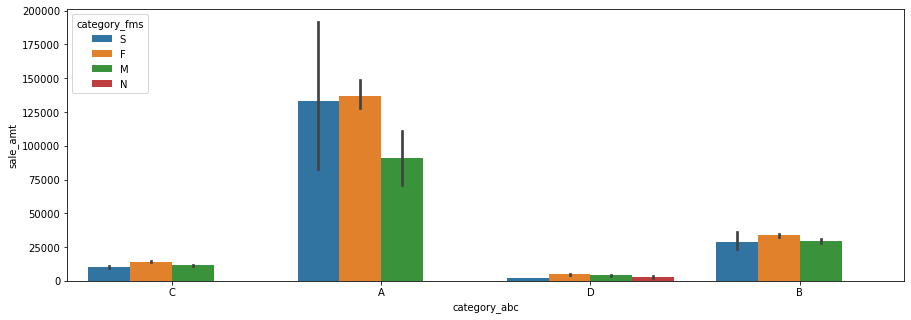

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='category_abc', y='sale_amt', hue='category_fms')

### Sale Return

<AxesSubplot:xlabel='category_abc', ylabel='sale_return_amt'>

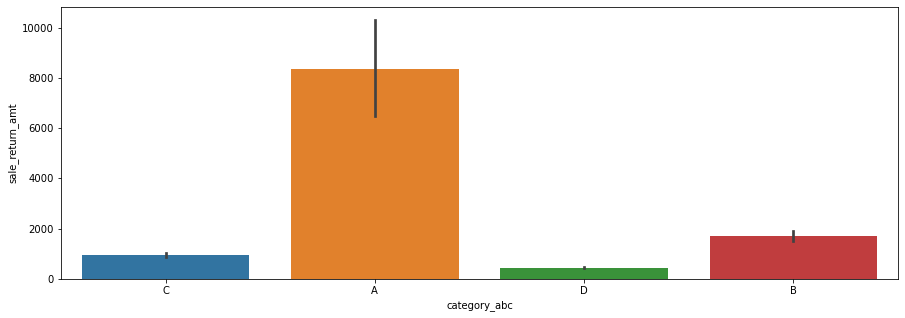

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='category_abc', y='sale_return_amt')

<AxesSubplot:xlabel='category_fms', ylabel='sale_return_amt'>

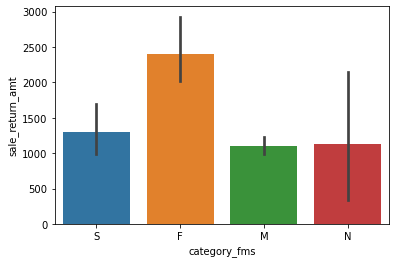

In [90]:
sns.barplot(data=df, x='category_fms', y='sale_return_amt')

<AxesSubplot:>

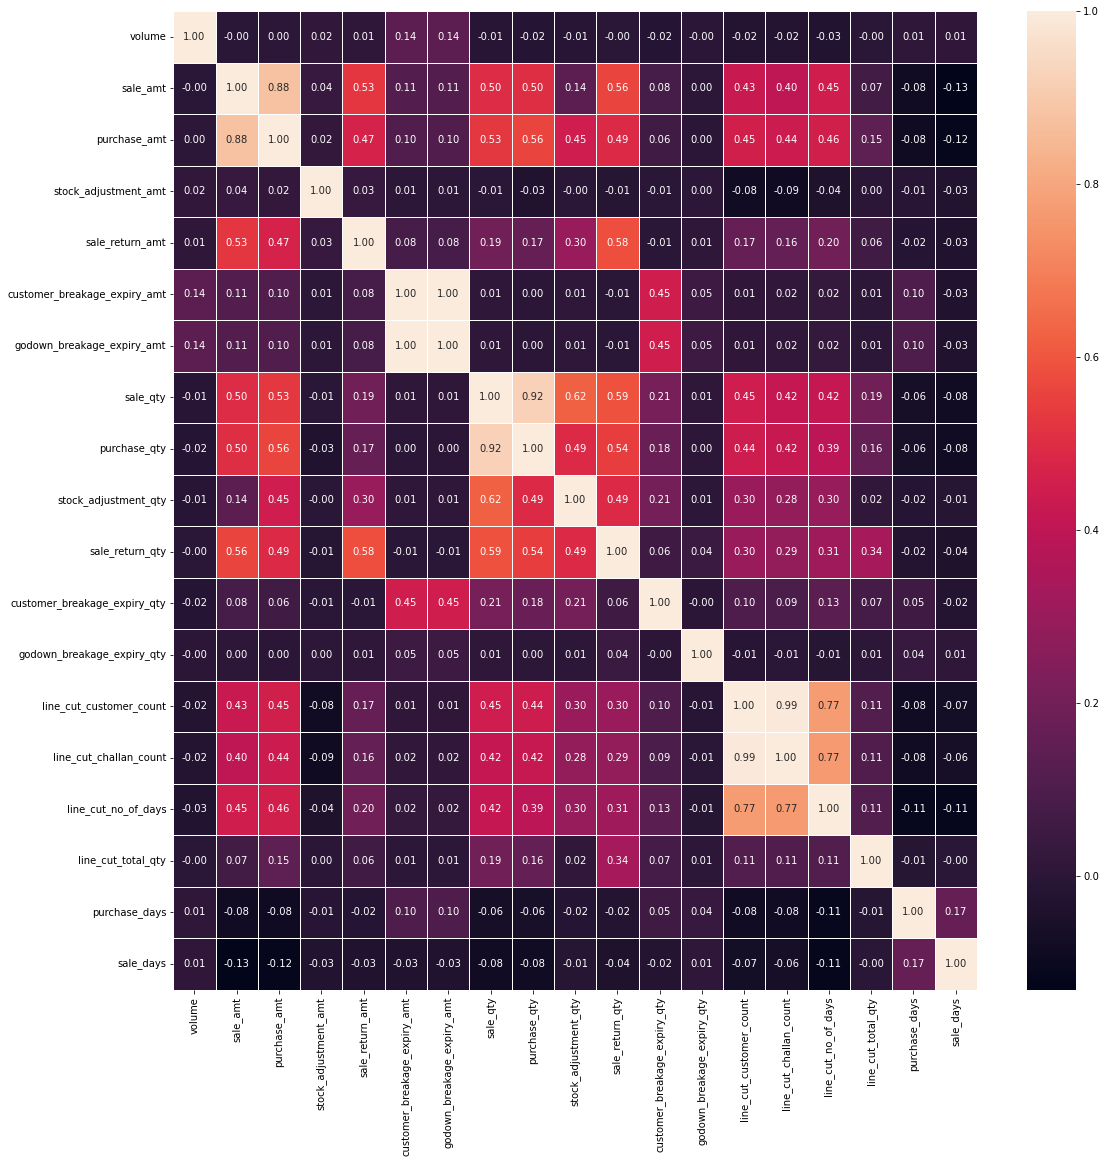

In [98]:
plt.figure(figsize=(18,18))
# colormap = sns.color_palette("Greens")
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5)